# Problem Description

**How do you uncover the stars behind the numbers?**

In football, player ratings are the ultimate measure of skill, form, and reputation. For fans, scouts, and gaming enthusiasts, these ratings are more than just numbers—they’re a gateway to understanding the game’s brightest talents. But what if you could predict these ratings? What if you could break down the attributes and statistics that separate the world's best from the rest?

This project takes on the challenge of predicting FIFA 23 player ratings. Armed with a dataset packed with rich player attributes—like pace, dribbling, shooting, and defending—we’ll dive into the stats to uncover the patterns that define greatness. From the young prodigy with raw talent to the seasoned veteran commanding the midfield, every player’s story is written in their numbers.

But this isn’t just a simple prediction task. Players come in all shapes, sizes, and styles, and their ratings are shaped by a complex interplay of physical attributes, technical skills, and even their role on the pitch. Can a lightning-fast winger's rating be predicted in the same way as a towering central defender's? These nuances make the problem both challenging and exciting.

The stakes are high—getting this right could offer insights into scouting, team building, and even gaming strategies. For clubs, it could mean a new way to spot hidden gems. For gamers, it’s a chance to understand what makes their favorite players tick. And for us, it’s an opportunity to explore the beauty of football through the lens of machine learning.

Can we crack the code behind FIFA ratings and predict the stars of the game?



# Dependencies loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.preprocessing import LabelEncoder

# Utilities
import os
import warnings
warnings.filterwarnings('ignore')


### Project setup

In [2]:
fifa_url = 'https://raw.githubusercontent.com/Niyetali/FIFA-Rating-Prediction/refs/heads/main/input/FIFA23_official_data.csv'
# Configuration to display all columns (the dataset has many features)
pd.set_option('display.max_columns', None)


# Data preparation

In [3]:
df = pd.read_csv(fifa_url, sep=',')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,€91M,€115K,2312,Right,4.0,4.0,3.0,High/ Medium,Unique,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,€78.5M,€190K,2305,Right,3.0,3.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,€46.5M,€46K,2303,Left,2.0,3.0,3.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,€107.5M,€350K,2303,Right,4.0,5.0,4.0,High/ High,Unique,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,€89.5M,€110K,2296,Right,3.0,3.0,3.0,High/ High,Normal (170-),Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [4]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

Lets remove the obvious features that intuitively do not have a significant meaning in terms of predicting a footballer's rating

In [5]:
# List of columns to drop
columns_to_drop = ['Photo', 'Flag', 'Club Logo', 'Real Face', 'Kit Number',
                    'ID', 'Special', 'Joined', 'Contract Valid Until']

# Drop columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the remaining columns
print(df.columns)


Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Loaned From',
       'Height', 'Weight', 'Release Clause', 'Best Overall Rating'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      17660 non-null  object 
 1   Age                       17660 non-null  int64  
 2   Nationality               17660 non-null  object 
 3   Overall                   17660 non-null  int64  
 4   Potential                 17660 non-null  int64  
 5   Club                      17449 non-null  object 
 6   Value                     17660 non-null  object 
 7   Wage                      17660 non-null  object 
 8   Preferred Foot            17660 non-null  object 
 9   International Reputation  17660 non-null  float64
 10  Weak Foot                 17660 non-null  float64
 11  Skill Moves               17660 non-null  float64
 12  Work Rate                 17660 non-null  object 
 13  Body Type                 17622 non-null  object 
 14  Positi

## Dataset Adjustment

### Handling NA Values

It goes without saying that it is crucial to deal with NaN Values to proceed further with dataset analysis and later, improve a Model's performance. Thus, we will investigate whether to remove or fill these NaN values in our dataset

In [7]:
print(df.isnull().sum())

Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          211
Value                           0
Wage                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Position                       35
Loaned From                 16966
Height                          0
Weight                          0
Release Clause               1151
Best Overall Rating         17639
dtype: int64


In [8]:
# Best Overall Rating has too many missing values so it wouldnt make sense to keep it
df = df.drop(columns=['Best Overall Rating'])

# The original owner of the player might make sense to keep for now
df['Loaned From'] = df['Loaned From'].fillna('Permanent') 

`Club`, `Position` and `Body Type` have only a few missing values. We can fill `Clubs` with *Unknowns*, which would not have a dramatic impact on our analysis, while `Body Type` can be NaNs can be filled with refernce to `Height` and `Height`, i.e taller, heavier players might have *Stocky*, while shorter ones might have *Lean*. 

Before engaging with other missing values, lets convert the cariables into appropriate data types to make our work more convinient.

### Club and Name

In [9]:
df['Club'] = df['Club'].astype('category')
df['Club'].head

<bound method NDFrame.head of 0        FC Bayern München
1        Manchester United
2               Sevilla FC
3          Manchester City
4                    Inter
               ...        
17655        Meizhou Hakka
17656       Jeju United FC
17657         Ümraniyespor
17658       Fleetwood Town
17659       IFK Norrköping
Name: Club, Length: 17660, dtype: category
Categories (926, object): ['1. FC Heidenheim 1846', '1. FC Kaiserslautern', '1. FC Köln', '1. FC Magdeburg', ..., 'İstanbulspor', 'İttifak Holding Konyaspor', 'ŁKS Łódź', 'Śląsk Wrocław']>

In [10]:
df['Name'] = df['Name'].astype('category')
df['Name'].head

<bound method NDFrame.head of 0            L. Goretzka
1        Bruno Fernandes
2               M. Acuña
3           K. De Bruyne
4             N. Barella
              ...       
17655      Deng Xiongtao
17656     22 Lim Jun Sub
17657           A. Demir
17658       21 S. Czajor
17659    21 F. Jakobsson
Name: Name, Length: 17660, dtype: category
Categories (17140, object): ['07 C. Mengi', '07 F. Déhu', '07 G. Warmuz', '07 I. Paskov', ..., 'Ž. Rogelj', 'Ž. Zaletel', 'Ș. Pănoiu', 'Ș. Tomache']>

In [11]:
# Setting "Unknown" as a new category 
df['Club'] = df['Club'].cat.add_categories('Unknown')

# Now lets fill the column
df['Club'] = df['Club'].fillna('Unknown')

### Weight

In [12]:
df['Weight'].head

<bound method NDFrame.head of 0        82kg
1        69kg
2        69kg
3        70kg
4        68kg
         ... 
17655    78kg
17656    84kg
17657    82kg
17658    79kg
17659    78kg
Name: Weight, Length: 17660, dtype: object>

In [13]:
# Removing kg suffix 
df['Weight'] = df['Weight'].str.replace('kg', '').astype('int64')
print(df['Weight'].head())


0    82
1    69
2    69
3    70
4    68
Name: Weight, dtype: int64


### Height

In [14]:
df['Height'].head

<bound method NDFrame.head of 0        189cm
1        179cm
2        172cm
3        181cm
4        172cm
         ...  
17655    190cm
17656    195cm
17657    190cm
17658    187cm
17659    186cm
Name: Height, Length: 17660, dtype: object>

In [15]:
# Removing cm suffix 
df['Height'] = df['Height'].str.replace('cm', '').astype('int64')
print(df['Height'].head())

0    189
1    179
2    172
3    181
4    172
Name: Height, dtype: int64


### Body Type

In [16]:
df['Body Type'] = df['Body Type'].str.split('(', expand=True)[0].str.strip()
df['Body Type'] = df['Body Type'].astype('category')
df['Body Type'].head

<bound method NDFrame.head of 0        Unique
1        Unique
2        Stocky
3        Unique
4        Normal
          ...  
17655    Normal
17656      Lean
17657      Lean
17658    Normal
17659    Normal
Name: Body Type, Length: 17660, dtype: category
Categories (4, object): ['Lean', 'Normal', 'Stocky', 'Unique']>

In [17]:
# Filling Body Type based on Height and Weight thresholds
def fill_body_type(row):
    if pd.isnull(row['Body Type']):
        if row['Height'] > 185 and row['Weight'] > 80:
            return 'Stocky'
        elif row['Height'] < 175 and row['Weight'] < 70:
            return 'Lean'
        else:
            return 'Normal'
    return row['Body Type']

df['Body Type'] = df.apply(fill_body_type, axis=1)

### Value, Wage and Release Clause

In [18]:
print(df["Value"])
print(df["Wage"])
print(df["Release Clause"])

0           €91M
1         €78.5M
2         €46.5M
3        €107.5M
4         €89.5M
          ...   
17655      €100K
17656      €100K
17657       €70K
17658       €90K
17659       €90K
Name: Value, Length: 17660, dtype: object
0        €115K
1        €190K
2         €46K
3        €350K
4        €110K
         ...  
17655     €500
17656     €500
17657      €2K
17658     €500
17659     €500
Name: Wage, Length: 17660, dtype: object
0          €157M
1          €155M
2         €97.7M
3        €198.9M
4        €154.4M
          ...   
17655      €218K
17656      €188K
17657      €142K
17658      €214K
17659      €131K
Name: Release Clause, Length: 17660, dtype: object


Lets convert `Value`, `Release Clause` and `Wage` into a float variable

In [19]:
# conversion function
def convert_currency(value):
    if isinstance(value, str):
        value = value.replace('€', '')  # Removing the Euro sign
        if 'M' in value:  # For values in millions
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:  # For values in thousands
            return float(value.replace('K', '')) * 1_000
        else:  # For values without suffix
            return float(value)
    return 0  # Handle NaN or missing values

# Applying the function to 'Value' and 'Wage' 
df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)

print(df[['Value', 'Wage', 'Release Clause']].head())


         Value      Wage  Release Clause
0   91000000.0  115000.0     157000000.0
1   78500000.0  190000.0     155000000.0
2   46500000.0   46000.0      97700000.0
3  107500000.0  350000.0     198900000.0
4   89500000.0  110000.0     154400000.0


In [20]:
# Filling missing values for Release Clause with median 
release_clause_median = df['Release Clause'].median()
df['Release Clause'] = df['Release Clause'].fillna(release_clause_median)

### Position

Now lets convert the other columns into categorical.

Starting with Position,  can find see that the HTML code is blended (probably when the data is scrapped) with the Position column. We will clean those.

In [21]:
df['Position'] = df['Position'].apply(lambda x: x.split(">")[1] if isinstance(x, str) and ">" in x else x)

# Conversion
df['Position'] = df['Position'].astype('category')

# Verification 
print(df['Position'].head())


0    SUB
1    LCM
2     LB
3    RCM
4    RCM
Name: Position, dtype: category
Categories (29, object): ['CAM', 'CB', 'CDM', 'CF', ..., 'RW', 'RWB', 'ST', 'SUB']


`Position` has only a few missing values so we can simply drop those instances

In [22]:
df = df.dropna(subset=['Position'])

print(f"Number of missing values in 'Position': {df['Position'].isnull().sum()}")
print(f"New shape of the dataset: {df.shape}")

Number of missing values in 'Position': 0
New shape of the dataset: (17625, 19)


#### Nationality

In [23]:
# Conversion
df['Nationality'] = df['Nationality'].astype('category')

### Preferred foot

In [24]:
df["Preferred Foot"].head

<bound method NDFrame.head of 0        Right
1        Right
2         Left
3        Right
4        Right
         ...  
17655    Right
17656    Right
17657    Right
17658    Right
17659     Left
Name: Preferred Foot, Length: 17625, dtype: object>

it is probably reasonable to convert thhis feature into a binary variable

In [25]:
# Map "Right" to 1 and "Left" to 0
df['Preferred Foot'] = df['Preferred Foot'].map({'Right': 1, 'Left': 0})

# Check unique values after conversion
print(df['Preferred Foot'].unique())


[1 0]


In [26]:
# Verification
print(df.isnull().sum())

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Loaned From                 0
Height                      0
Weight                      0
Release Clause              0
dtype: int64


# Dataset Splitting

In [27]:
# Define features (X) and target (y)
X = df.drop('Overall', axis = 1)
y = df['Overall']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
print(X_train.shape, X_test.shape)

(14100, 18) (3525, 18)


In [29]:
print(y_train.shape, y_test.shape)

(14100,) (3525,)


# Explorartory Data Analysis

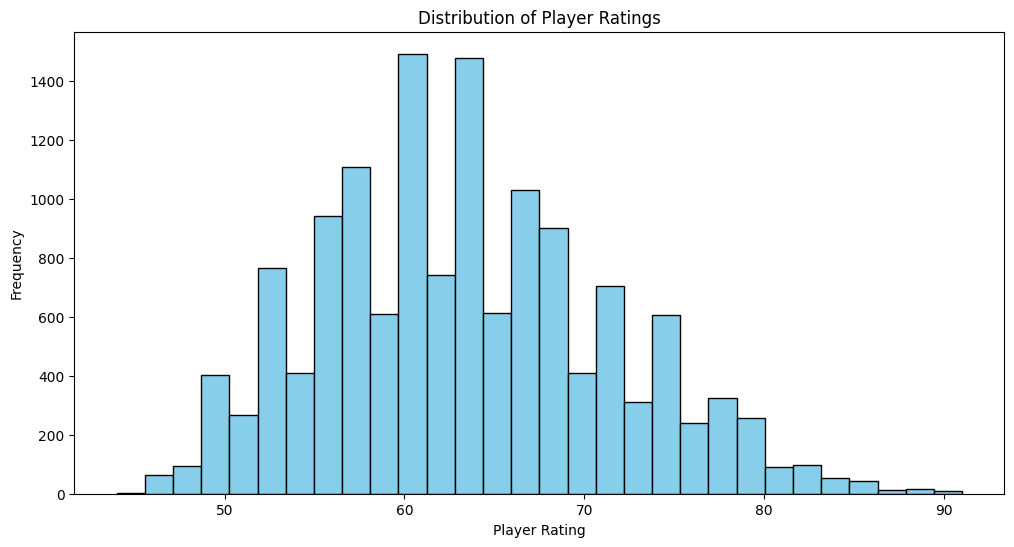

In [30]:
# Lets analyze the distribution of player ratings
plt.figure(figsize=(12, 6))
plt.hist(y_train, bins=30, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Distribution of Player Ratings')
plt.xlabel('Player Rating')
plt.ylabel('Frequency')

plt.show()


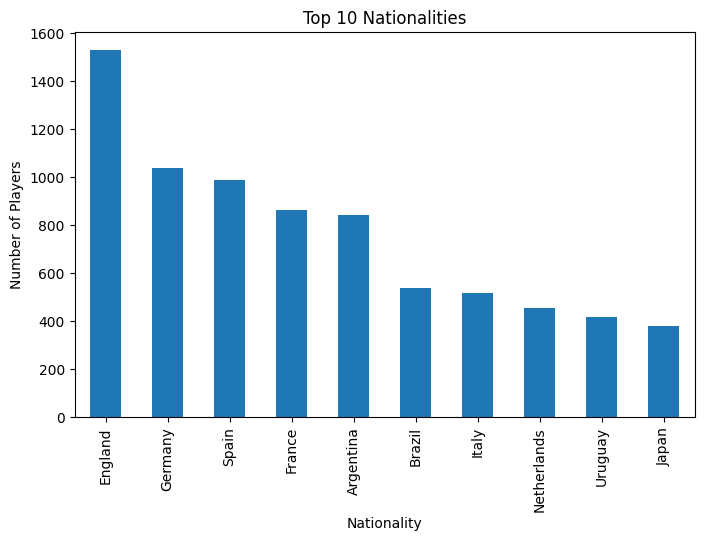

In [31]:
X['Nationality'].value_counts().head(10).plot(kind='bar', figsize=(8, 5))
plt.title('Top 10 Nationalities')
plt.ylabel('Number of Players')
plt.show()


England is the country that "produces" the most players.

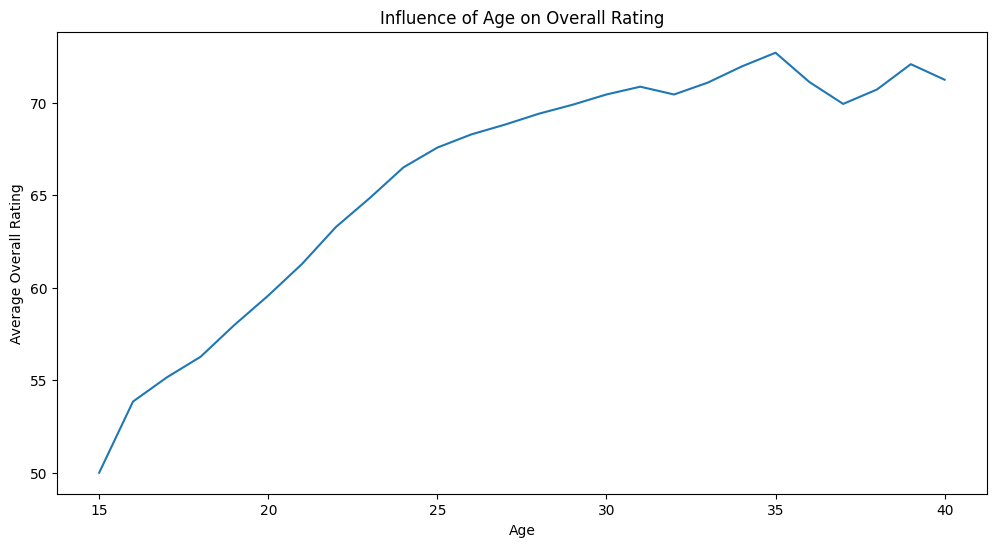

In [32]:
df = pd.concat([X, y], axis=1)

filtered_dataset = df[df['Age'] < 41]

age_rating = filtered_dataset.groupby('Age')['Overall'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(age_rating['Age'], age_rating['Overall'])
plt.title('Influence of Age on Overall Rating')
plt.xlabel('Age')
plt.ylabel('Average Overall Rating')
plt.show()

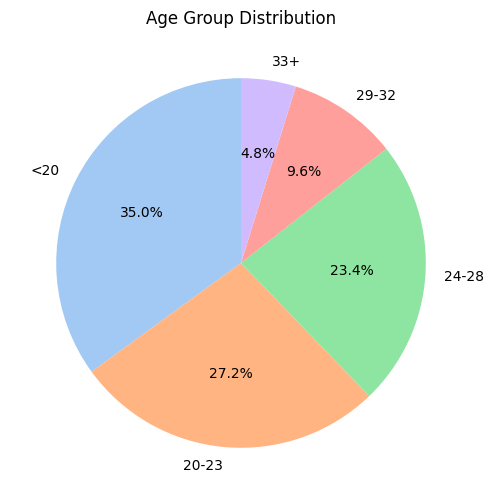

In [33]:
# Age bins and labels
age_bins = [0, 20, 23, 28, 32, 100]  # Include a wide range for upper limit
labels = ['<20', '20-23', '24-28', '29-32', '33+']

# Counting occurrences of each group
age_group_counts = pd.cut(df['Age'], bins=age_bins, labels=labels).value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("pastel", len(labels)), startangle=90)

plt.title('Age Group Distribution')
plt.show()

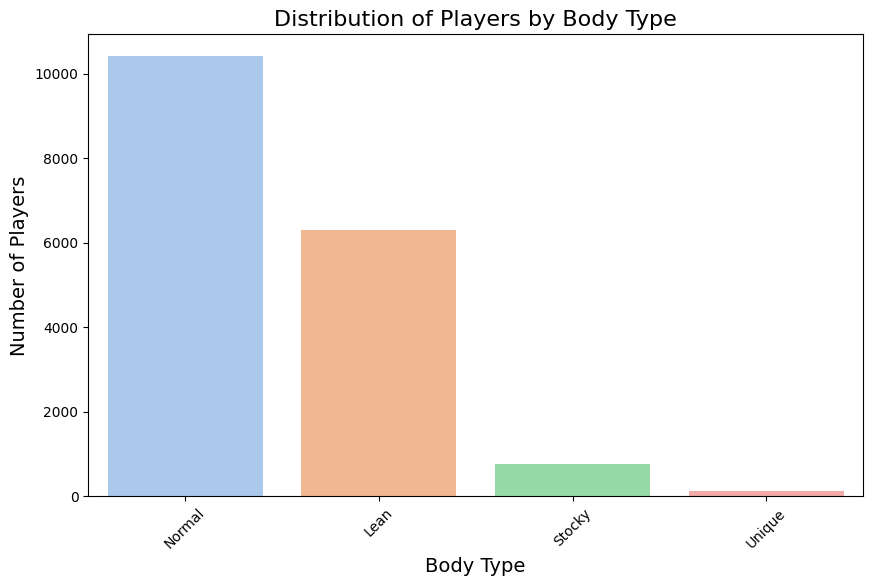

In [34]:
body_type_counts = df['Body Type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=body_type_counts.index, y=body_type_counts.values, palette='pastel')
plt.title('Distribution of Players by Body Type', fontsize=16)
plt.xlabel('Body Type', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

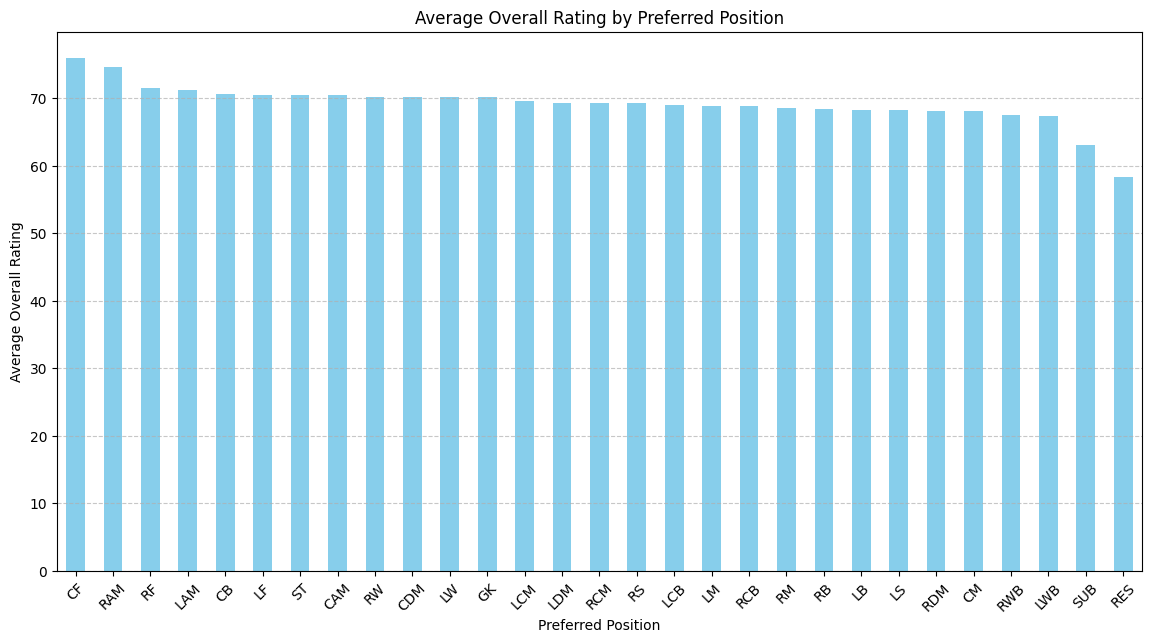

In [35]:
# Lets visualise the relationship between Average Ranking and Position 
position_overall = df.groupby('Position')['Overall'].mean().sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(14, 7))
position_overall.plot(kind='bar', color='skyblue')
plt.xlabel('Preferred Position')
plt.ylabel('Average Overall Rating')
plt.title('Average Overall Rating by Preferred Position')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The bar plot shows that Center Forwards are, on average, rated higher than other positions

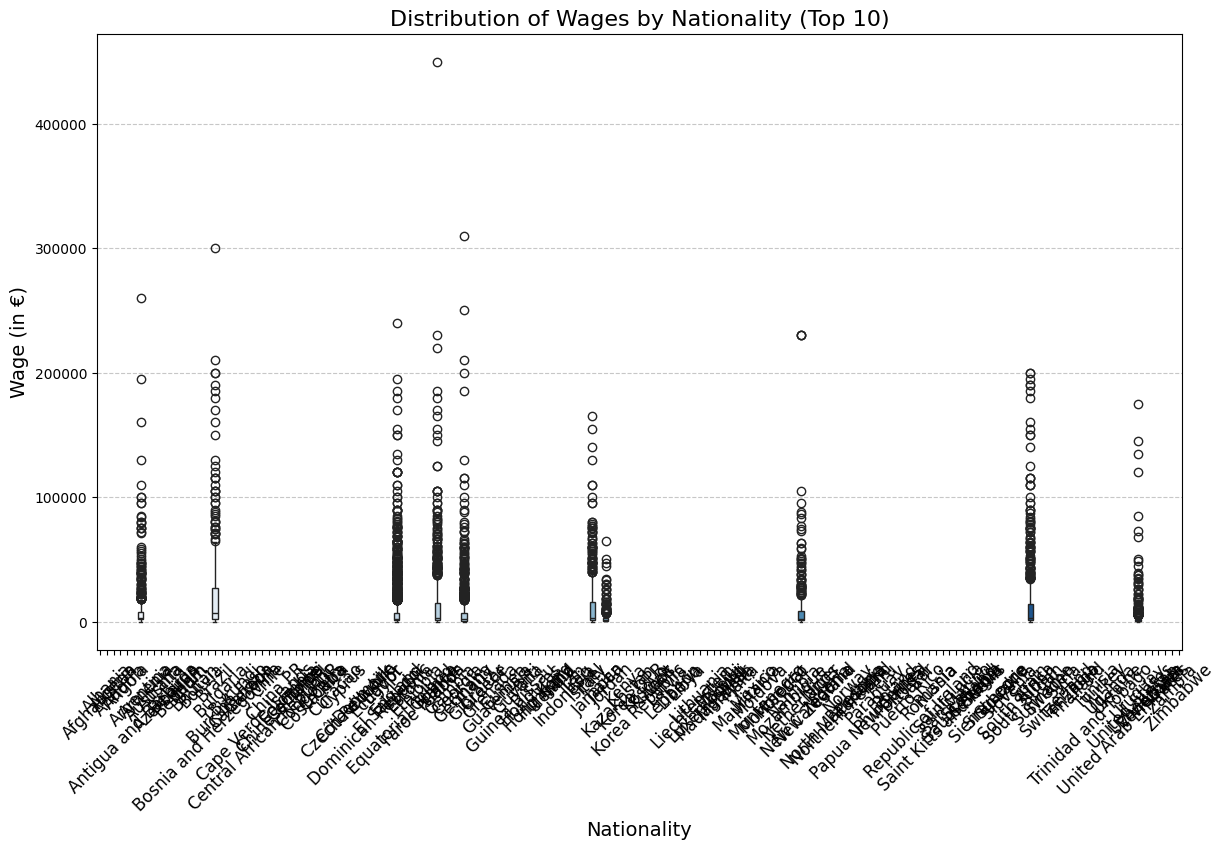

In [36]:
# Lets see if Nationality affects on what you would earn as a footballer :)
top_nationalities = df['Nationality'].value_counts().head(10).index # Top 10
df_top_nationalities = df[df['Nationality'].isin(top_nationalities)]

# Box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_nationalities, x='Nationality', y='Wage', palette='Blues')

plt.title('Distribution of Wages by Nationality (Top 10)', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Wage (in €)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Based on the box plot, most nationalities exhibit their median wages in the lower range, indicating that the majority of players earn relatively modest wages. However, outliers with exceptionally high wages are visible across many nationalities, especially for Brazil, Argentina, and England, which may reflect the presence of globally renowned players with extraordinary earnings. In contrast, countries like Japan and Uruguay display a much smaller range of wages, highlighting less variability among players from these nations. Meanwhile, nationalities such as Spain and France demonstrate a consistent and balanced wage distribution, with fewer extreme outliers compared to other countries.

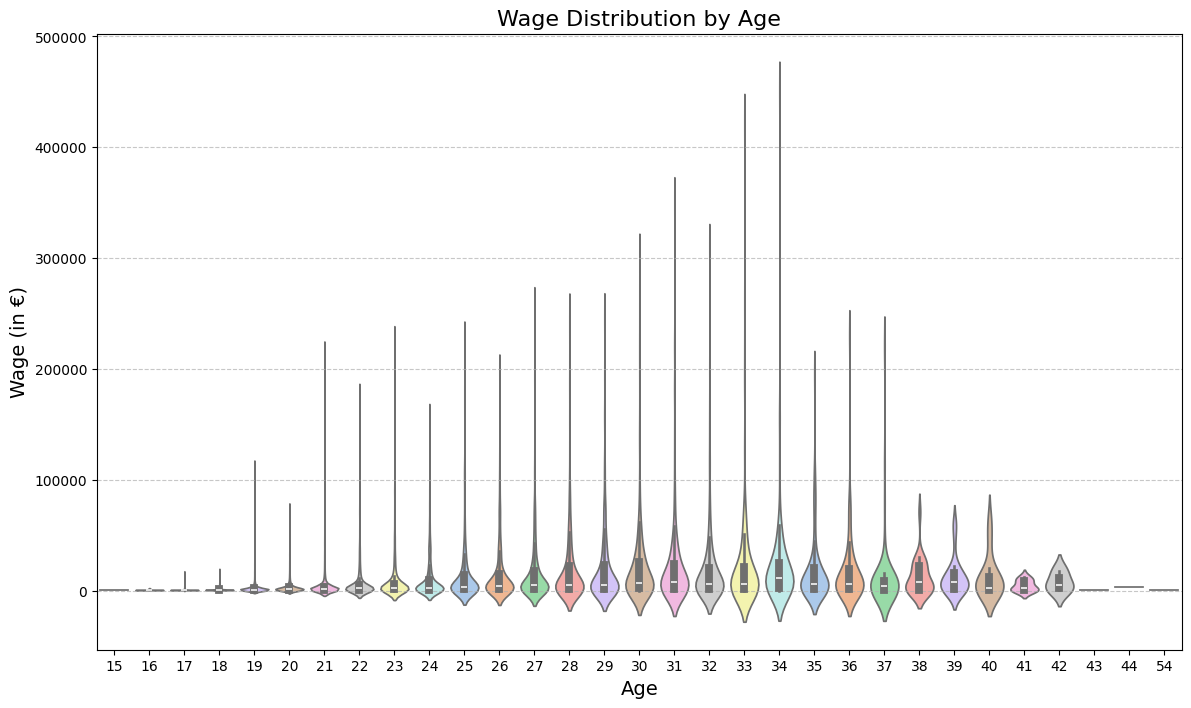

In [37]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df, x='Age', y='Wage', palette='pastel')
plt.title('Wage Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Wage (in €)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The Violin Plot above illustrates that wages tend to peak during prime ages, particularly in the 25 to 30-year-old range, where the distribution of wages is the widest. This indicates that players in this age group are more likely to command extremely high wages, with some exceeding €300,000. As players age beyond 30, the wage distributions become narrower, reflecting a decline in the number of players earning exceptionally high wages. While outliers still exist among older players (e.g., some earning over €100,000), the majority tend to earn relatively lower wages as they approach the later stages of their careers.

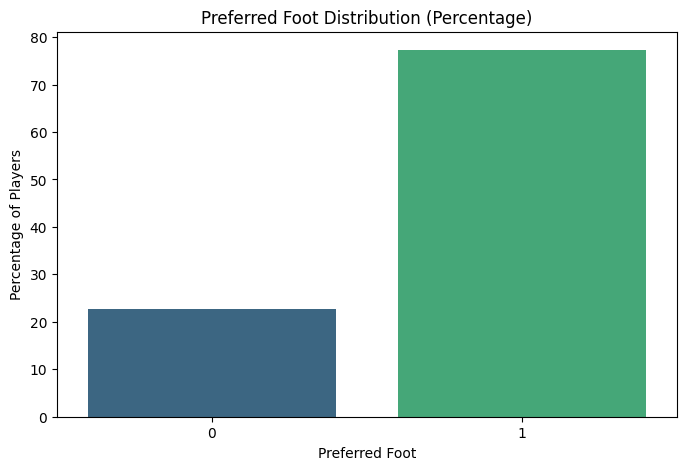

In [38]:
# percentage distribution in terms of foot preference
preferred_foot_percentage = df['Preferred Foot'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=preferred_foot_percentage.index, y=preferred_foot_percentage.values, palette='viridis')

plt.title('Preferred Foot Distribution (Percentage)')
plt.xlabel('Preferred Foot')
plt.ylabel('Percentage of Players')

plt.show()


Turns out left footers are more rare compared to right footers

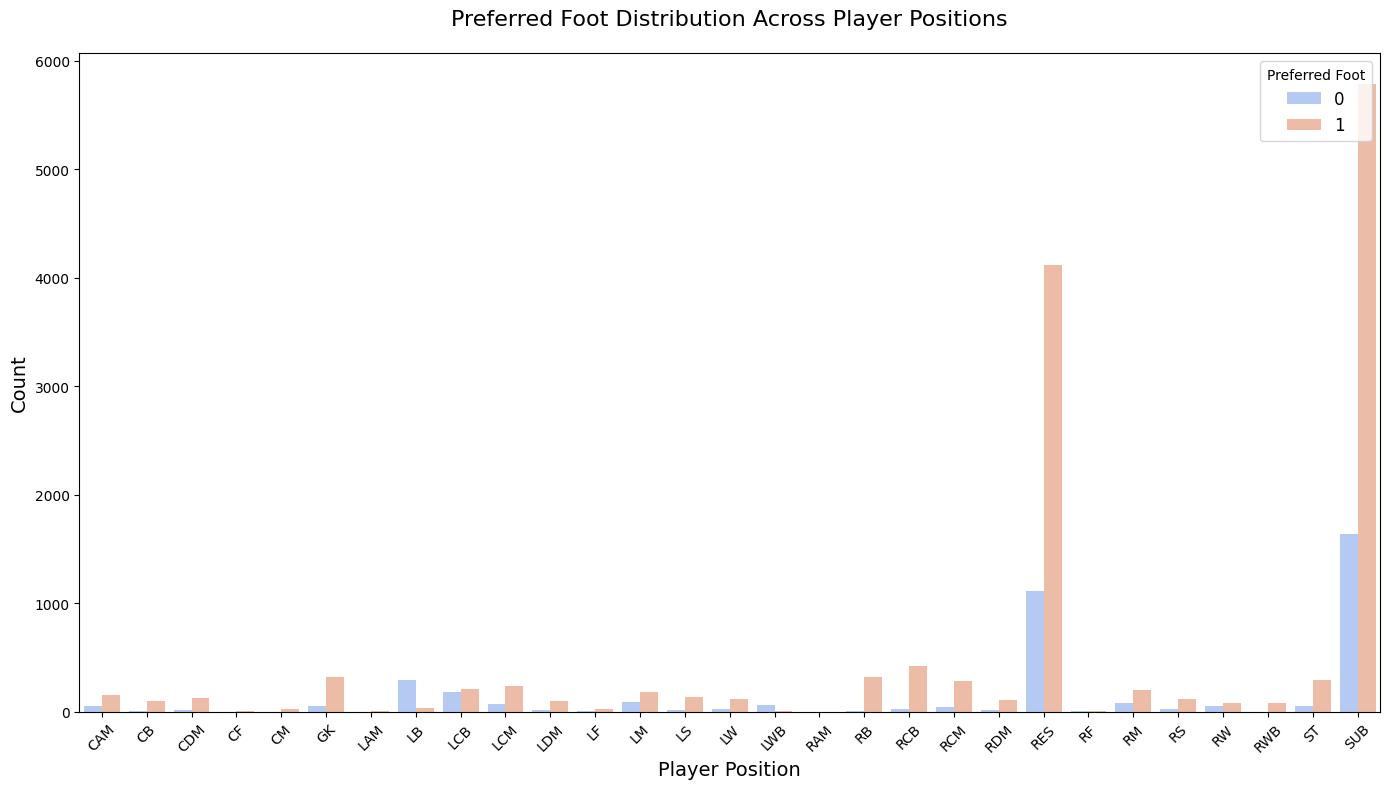

In [39]:
# Grouping by Position and Preferred Foot
dft = df.groupby("Position")["Preferred Foot"].value_counts().reset_index(name='Count')

# figure size
plt.figure(figsize=(14, 8))

# bar plot
p = sns.barplot(x='Position', y='Count', data=dft, hue='Preferred Foot', palette='coolwarm')

p.set_title('Preferred Foot Distribution Across Player Positions', fontsize=16, pad=20)
p.set_xlabel('Player Position', fontsize=14)
p.set_ylabel('Count', fontsize=14)

plt.xticks(rotation=45, fontsize=10)

p.legend(title='Preferred Foot', loc='upper right', fontsize=12)

# displaying the plot
plt.tight_layout()
plt.show()


Therefore, it should be no surprise that right footers dominate practically at all positions. 

# Statistical Analysis

### Basic Statistics

In [40]:
# Setting format to avoid scientific notation
pd.options.display.float_format = '{:,.2f}'.format

# Summary statistics
print(df.describe())


            Age  Potential          Value       Wage  Preferred Foot  \
count 17,625.00  17,625.00      17,625.00  17,625.00       17,625.00   
mean      23.12      70.98   2,745,215.49   8,205.96            0.77   
std        4.63       6.53   7,848,110.94  20,493.84            0.42   
min       15.00      42.00           0.00       0.00            0.00   
25%       20.00      67.00     325,000.00     550.00            1.00   
50%       22.00      71.00     700,000.00   2,000.00            1.00   
75%       26.00      75.00   1,800,000.00   6,000.00            1.00   
max       54.00      95.00 190,500,000.00 450,000.00            1.00   

       International Reputation  Weak Foot  Skill Moves    Height    Weight  \
count                 17,625.00  17,625.00    17,625.00 17,625.00 17,625.00   
mean                       1.11       2.90         2.30    180.89     74.33   
std                        0.40       0.66         0.75      6.96      6.98   
min                        1.00    

## Chi-square Test

In [41]:
# list categorical variables
categorical_columns = X_train.select_dtypes(include=['category']).columns

# Chi-Square test
for column in categorical_columns:
    crosstab = pd.crosstab(X_train[column], y_train)
    chi2, p, dof, expected = chi2_contingency(crosstab)
    print(f"Chi-Square Test for {column}: p-value = {p}")

Chi-Square Test for Name: p-value = 0.617115376125111
Chi-Square Test for Nationality: p-value = 0.0
Chi-Square Test for Club: p-value = 0.0
Chi-Square Test for Position: p-value = 0.0


It is clearly seen that the p-value for Name is very high, indicating no significant association between the Name variable and the dependent variable. Club and Best Position, on the contrary, have low p-value. Thus, we will remove the Name column as well

## Point-Biserial Correlation

In [42]:
# list of numerical variables
numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns

# point-biserial correlation
for column in numerical_columns:
    correlation, p_value = pointbiserialr(X_train[column], y_train)
    print(f"Correlation between {column} and y: {correlation}, p-value: {p_value}")

Correlation between Age and y: 0.5962228970249466, p-value: 0.0
Correlation between Potential and y: 0.7065234567438479, p-value: 0.0
Correlation between Value and y: 0.5634395225568458, p-value: 0.0
Correlation between Wage and y: 0.5997895156763592, p-value: 0.0
Correlation between Preferred Foot and y: -0.07119002484204912, p-value: 2.5983417890279673e-17
Correlation between International Reputation and y: 0.4811669564597424, p-value: 0.0
Correlation between Weak Foot and y: 0.2621061038413658, p-value: 3.3293100032155525e-220
Correlation between Skill Moves and y: 0.4397730120917164, p-value: 0.0
Correlation between Height and y: 0.059776169183491386, p-value: 1.214164433979041e-12
Correlation between Weight and y: 0.16130784477905874, p-value: 8.073910650889751e-83
Correlation between Release Clause and y: 0.5380636437314801, p-value: 0.0


The p-value for Preferred Foot is very low, but its weak correlation coefficient indicates a negligible relationship with the dependent variable. Similarly, Height and Weight have weak correlations despite their statistical significance. On the other hand, features like Potential, Wage, Age, and Value show strong correlations with the dependent variable and have extremely low p-values. Thus, we will prioritize these strongly correlated features in the analysis and consider dropping features with weak or negligible relationships, such as Preferred Foot

## Final Decision 

In the light of the aforementioned analysis, it seems reasonable to remove `Name`, `Preferred Foot`, `Height`, `Weight`, as they have minimal impact on predicting `Overall` and can be safely dropped unless specific modeling contexts require them.


In [43]:
X_train= X_train.drop(columns=['Name','Preferred Foot', 'Height', 'Weight'])
X_test= X_test.drop(columns=['Name','Preferred Foot', 'Height', 'Weight'])

In [44]:
print(X_train.shape, X_test.shape)

(14100, 14) (3525, 14)


In [45]:
print(y_train.shape, y_test.shape)

(14100,) (3525,)


In [46]:
X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Datasets successfully exported as CSV files.")

Datasets successfully exported as CSV files.
